# COREFL: Corpus of English as a Foreign Language

http://corefl.learnercorpora.com/user_guide/corpus_design

## Set up

### Requirements

#### Install

In [1]:
#python
#jupyternotebook

In [2]:
!pip install textstat
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install nltk
!pip install xgboost
!pip install pandas matplotlib networkx


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


#### Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import xgboost as xgb
import networkx as nx

### Import Data

In [4]:
lc = pd.read_csv("texts.csv", delimiter='	')

lc.head(2)

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,...,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writing/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text
0,Learners,DE_SP_B1_26_13_13_TM,2016,30 / 60,50.0,B1 (lower intermediate),Male,26.0,Bremen,BiPEB: English Speaking Cultures,...,A1 (lower beginner),Spoken,13,13. Frog,spoken_offline_classroom,NaN,Inside classroom,NaN,One day Tommy found a frog in a forest and bro...,NaN
1,Learners,DE_WR_B1_26_13_13_TM,2016,30 / 60,50.0,B1 (lower intermediate),Male,26.0,Bremen,BiPEB: English Speaking Cultures,...,A1 (lower beginner),Written,13,13. Frog,written_online,NaN,Inside classroom,NaN,One day Tommy found a frog in the Forest. He b...,NaN


## Exploratory Data Analysis

### Basic properties of data

In [5]:
lc.shape

(1810, 41)

In [6]:
lc.describe()

,Year data collection,Placement test score (%),Age,Age of exposure to English,Years studying English,Stay abroad (months),Task number,Minutes taken to complete the task,Original text
count,1810.000000,1810.000000,1809.000000,1809.000000,1791.000000,1784.000000,1810.000000,993.00000,0.0
mean,2016.444751,62.527735,20.638474,7.505804,11.955109,3.334557,12.211050,44.47432,NaN
std,2.838277,24.132642,6.725807,4.168876,4.392245,11.027668,3.520247,156.07326,NaN
min,2012.000000,0.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.00000,NaN
25%,2013.000000,42.700000,17.000000,6.000000,9.000000,0.000000,13.000000,10.00000,NaN
50%,2018.000000,68.300000,20.000000,7.000000,12.000000,0.000000,13.000000,15.00000,NaN
75%,2019.000000,81.700000,22.000000,9.000000,14.000000,2.000000,14.000000,22.00000,NaN
max,2021.000000,100.000000,62.000000,50.000000,49.000000,228.000000,14.000000,1800.00000,NaN


In [7]:
lc.isna().sum()

Subcorpus                                                            0
Filename                                                             0
Year data collection                                                 0
Placement test score (raw)                                           5
Placement test score (%)                                             0
Proficiency                                                          0
Sex                                                                  0
Age                                                                  1
School/University/Institution                                       33
Major                                                              531
Year at university/school                                          224
L1                                                                   0
Father's native language                                             0
Mother's native language                                             0
Langua

In [8]:
lc.nunique()

Subcorpus                                                            1
Filename                                                          1807
Year data collection                                                 8
Placement test score (raw)                                         149
Placement test score (%)                                           105
Proficiency                                                          6
Sex                                                                  3
Age                                                                 49
School/University/Institution                                       92
Major                                                              382
Year at university/school                                          258
L1                                                                   2
Father's native language                                            29
Mother's native language                                            32
Langua

### Numeric feature distributions

Add some text about the observations

<Axes: xlabel='Year data collection'>

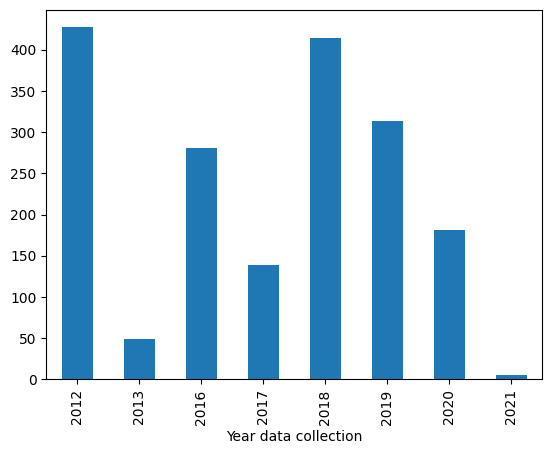

In [9]:
lc['Year data collection'].value_counts().sort_index().plot.bar()

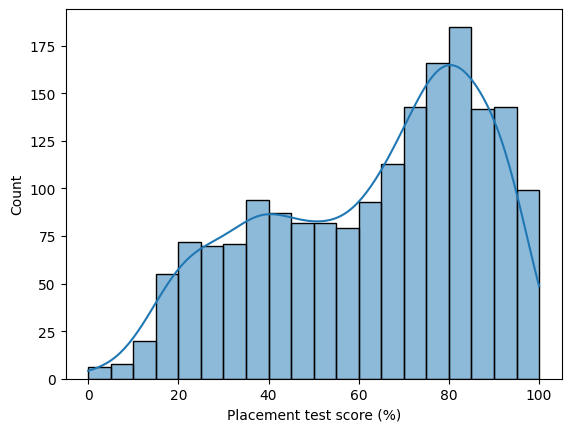

In [10]:
sns.histplot(lc['Placement test score (%)'], kde=True, bins=20)
plt.show()

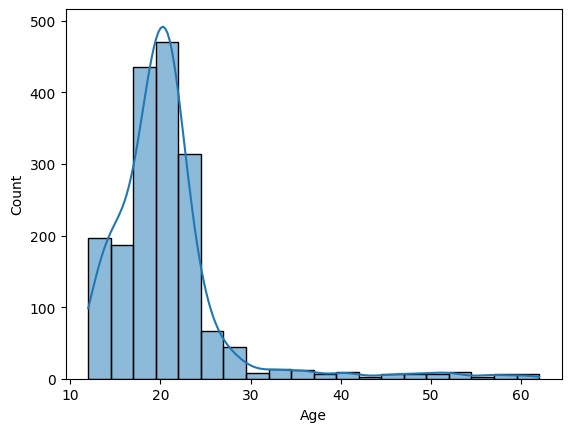

In [11]:
sns.histplot(lc['Age'], kde=True, bins=20)
plt.show()

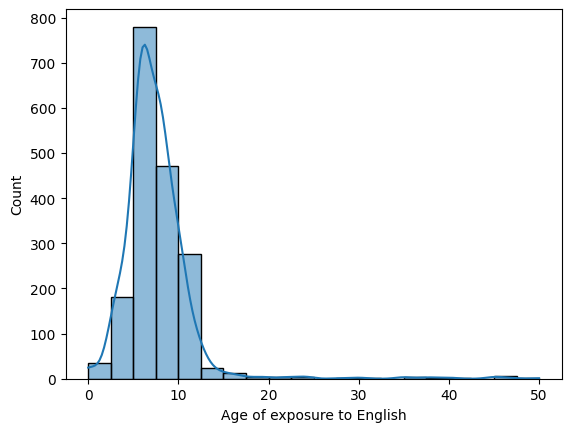

In [12]:
sns.histplot(lc['Age of exposure to English'], kde=True, bins=20)
plt.show()

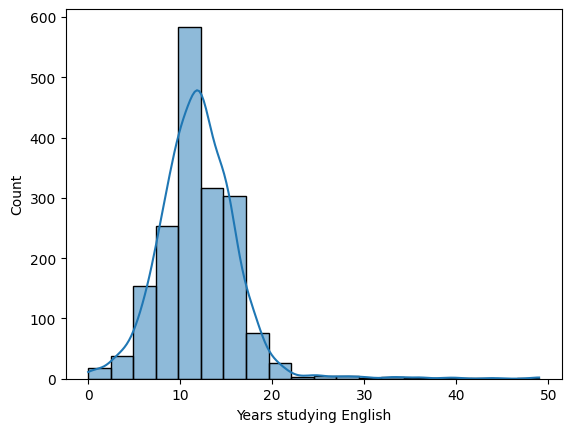

In [13]:
sns.histplot(lc['Years studying English'], kde=True, bins=20)
plt.show()

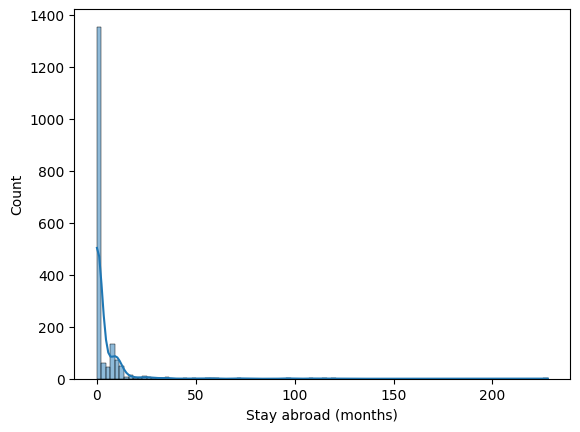

In [14]:
sns.histplot(lc['Stay abroad (months)'] , kde=True, bins=100)
plt.show()

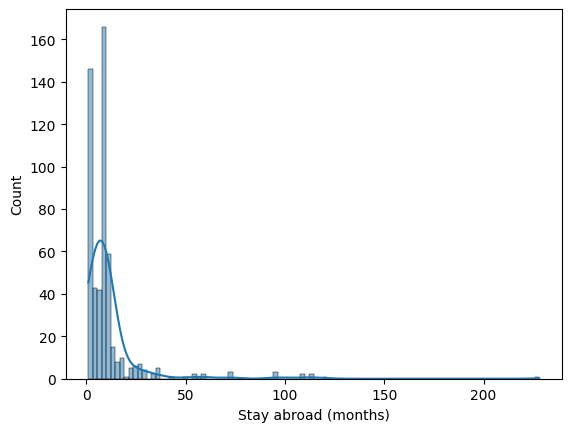

In [15]:
sns.histplot(lc[lc['Stay abroad (months)'] != 0]['Stay abroad (months)'] , kde=True, bins=100)
plt.show()

In [16]:
lc['Stay abroad (months)'].value_counts().sort_index()

Stay abroad (months)
0.00      1246
1.00        56
1.25         1
1.30         2
1.50         9
2.00        41
2.50         1
3.00        36
3.50         2
4.00        21
5.00        20
6.00        25
7.00        17
8.00        16
8.50         1
9.00       100
9.50         1
10.00       48
11.00       23
12.00       36
13.00       13
14.00        2
15.00        3
16.00        5
17.00        3
18.00        5
19.00        2
20.00        1
22.00        2
23.00        3
24.00        3
25.00        3
26.00        4
27.00        1
28.00        2
30.00        4
34.00        2
36.00        5
44.00        1
49.00        1
55.00        2
57.00        1
60.00        2
72.00        3
96.00        3
108.00       2
114.00       2
120.00       1
228.00       1
Name: count, dtype: int64

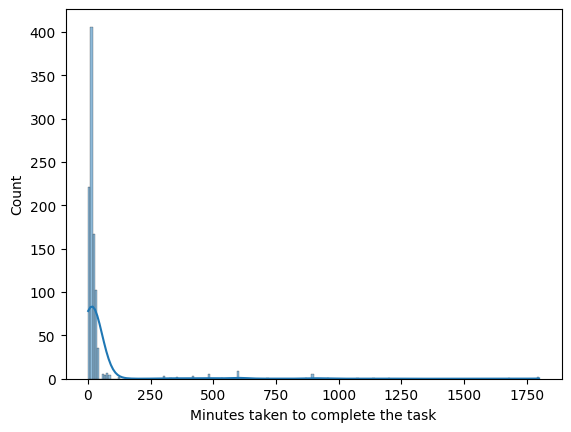

In [17]:
sns.histplot(lc['Minutes taken to complete the task'] , kde=True, bins=200)
plt.show()


<Axes: xlabel='Minutes taken to complete the task'>

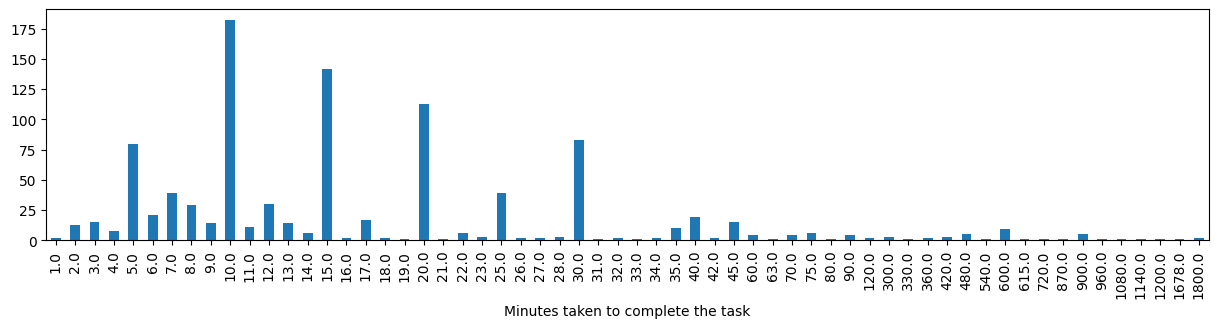

In [18]:
lc['Minutes taken to complete the task'].value_counts().sort_index().plot.bar(figsize=(15, 3))

### Categorical feature distributions

Add some text about the observations

<Axes: xlabel='Sex'>

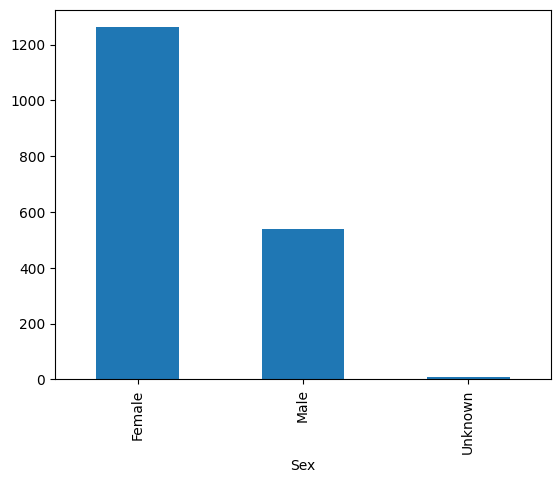

In [19]:
lc['Sex'].value_counts().plot.bar()

<Axes: xlabel='Task number'>

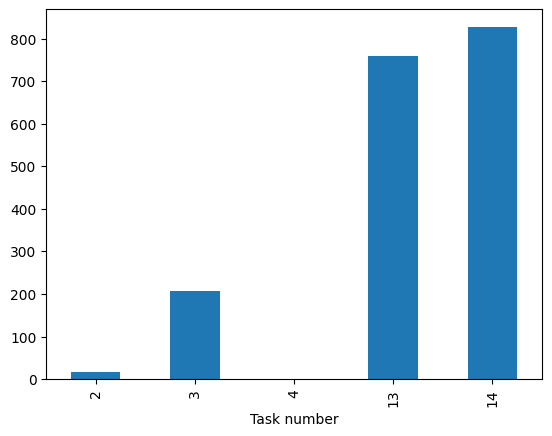

In [20]:
lc['Task number'].value_counts().sort_index().plot.bar()

## Feature Engineering

Credits to Nikita

### Feature selection

In [21]:
dataset_raw = lc
dataset_raw = dataset_raw.drop(columns=['Placement test score (raw)','Filename', 'Year data collection', 'Sex', 'School/University/Institution', 'Major', 'Stay abroad (where)', 'Stay abroad (when)', 
                           'Proficiency (self-assessment) speaking', 'Proficiency (self-assessment) listening', 'Proficiency (self-assessment) reading',
                            'Proficiency (self-assessment) in additional language speaking', 'Proficiency (self-assessment) in additional language listening',
       'Proficiency (self-assessment) in additional language reading', 'Proficiency (self-assessment) in additional language writing',
       'Medium', 'Writing/audio details', 'Minutes taken to complete the task', 'Where the task was done', 'Resources used', 'Original text', 'Additional foreign language(s)',
       "Father's native language", "Mother's native language", 'Proficiency (self-assessment)', 'Proficiency (self-assessment)', 'Year at university/school', 'Language certificates (type and level)'])

#Let us check the number of nan values in each column
print(dataset_raw.isna().sum())

Subcorpus                                                0
Placement test score (%)                                 0
Proficiency                                              0
Age                                                      1
L1                                                       0
Languages spoken at home                                 0
Age of exposure to English                               1
Years studying English                                  19
Stay abroad in English speaking country (>= 1 month)     0
Stay abroad (months)                                    26
Proficiency (self-assessment) writing                    9
Task number                                              0
Task title                                               0
Text                                                     0
dtype: int64


### NaN handling

In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Defining columns with missing values
columns_with_missing_values = ['Stay abroad (months)', 'Years studying English', 'Age', 'Age of exposure to English']

dataset_raw_imputed = dataset_raw.copy()
categorical_columns = dataset_raw_imputed[columns_with_missing_values].select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_data = encoder.fit_transform(dataset_raw_imputed[categorical_columns])

dataset_imputed = dataset_raw_imputed.drop(columns=categorical_columns)
dataset_imputed = pd.concat([dataset_imputed, pd.DataFrame(encoded_categorical_data)], axis=1)

# Initializing the K-NN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Applying K-NN imputation for all columns with missing values
dataset_imputed[columns_with_missing_values] = knn_imputer.fit_transform(dataset_imputed[columns_with_missing_values])
print("done")

done


### Tokenize sentences and lemmatize words

In [23]:
#### First let us define function that returns tokenized sentences and lemmatized words from the corresponding sentences
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

#Defining function to: 1) tokenize sentences, 2) lemmatize words in sentences
def tokenize_and_lemmatize(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    
    # Tokenize words and lemmatize
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    lemmatized_words = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_words.extend([lemmatizer.lemmatize(word) for word in words])
        tokenized_sentences.append(words)
    
    return tokenized_sentences, lemmatized_words
print("done")

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...


done


[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# dataset_imputed[['Tokenized Sentences', 'Lemmatized Words']] = dataset_imputed['Text'].apply(lambda x: tokenize_and_lemmatize(x))
nltk.download('omw-1.4')

tokenized_and_lemmatized = dataset_imputed['Text'].apply(lambda x: tokenize_and_lemmatize(x))
dataset_imputed[['Tokenized Sentences', 'Lemmatized Words']] = tokenized_and_lemmatized.apply(pd.Series)
print("done")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


done


In [25]:
dataset_imputed.head(2)

,Subcorpus,Placement test score (%),Proficiency,Age,L1,Languages spoken at home,Age of exposure to English,Years studying English,Stay abroad in English speaking country (>= 1 month),Stay abroad (months),Proficiency (self-assessment) writing,Task number,Task title,Text,Tokenized Sentences,Lemmatized Words
0,Learners,50.0,B1 (lower intermediate),26.0,German,German,8.0,13.0,No,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in a forest and bro...,"[[One, day, Tommy, found, a, frog, in, a, fore...","[One, day, Tommy, found, a, frog, in, a, fores..."
1,Learners,50.0,B1 (lower intermediate),26.0,German,German,8.0,13.0,No,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in the Forest. He b...,"[[One, day, Tommy, found, a, frog, in, the, Fo...","[One, day, Tommy, found, a, frog, in, the, For..."


### One Hot Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_columns(dataframe, categorical_columns):
    dataframe_encoded = dataframe.copy()
    
    categorical_data = dataframe_encoded[categorical_columns]
    
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    
    encoded_categorical_data = encoder.fit_transform(categorical_data)
    
    feature_names = encoder.get_feature_names_out(categorical_columns)
    
    encoded_dataframe = pd.DataFrame(encoded_categorical_data, columns=feature_names)
    

    dataframe_encoded.drop(categorical_columns, axis=1, inplace=True)
    
    dataframe_encoded = pd.concat([dataframe_encoded, encoded_dataframe], axis=1)
    
    return dataframe_encoded

dataframe_encoded = encode_categorical_columns(dataset_imputed, ['L1', 'Stay abroad in English speaking country (>= 1 month)'])
print("done")

done


In [27]:
dataframe_encoded.head(2)

#.drop(columns= ['Subcorpus', 'Proficiency (self-assessment) writing', 'Task number', 'Task title', 'Text'])

,Subcorpus,Placement test score (%),Proficiency,Age,Languages spoken at home,Age of exposure to English,Years studying English,Stay abroad (months),Proficiency (self-assessment) writing,Task number,Task title,Text,Tokenized Sentences,Lemmatized Words,L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes
0,Learners,50.0,B1 (lower intermediate),26.0,German,8.0,13.0,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in a forest and bro...,"[[One, day, Tommy, found, a, frog, in, a, fore...","[One, day, Tommy, found, a, frog, in, a, fores...",0.0,0.0
1,Learners,50.0,B1 (lower intermediate),26.0,German,8.0,13.0,0.0,B1 (lower intermediate),13,13. Frog,One day Tommy found a frog in the Forest. He b...,"[[One, day, Tommy, found, a, frog, in, the, Fo...","[One, day, Tommy, found, a, frog, in, the, For...",0.0,0.0


In [28]:
import nltk
nltk.download('punkt')

lc = dataframe_encoded

lc['tokenized_text'] = lc['Text'].apply(nltk.word_tokenize)

print(lc['tokenized_text'].head())


lc.columns

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [One, day, Tommy, found, a, frog, in, a, fores...
1    [One, day, Tommy, found, a, frog, in, the, For...
2    [One, day, a, little, boy, called, John, uh, w...
3    [One, day, ,, there, was, a, boy, called, John...
4    [One, day, a, boy, was, sitting, in, his, room...
Name: tokenized_text, dtype: object


Index(['Subcorpus', 'Placement test score (%)', 'Proficiency', 'Age',
       'Languages spoken at home', 'Age of exposure to English',
       'Years studying English', 'Stay abroad (months)',
       'Proficiency (self-assessment) writing', 'Task number', 'Task title',
       'Text', 'Tokenized Sentences', 'Lemmatized Words', 'L1_Spanish',
       'Stay abroad in English speaking country (>= 1 month)_Yes',
       'tokenized_text'],
      dtype='object')

### Feature Augmentation: extract features from text

In [29]:
# Number of unique words: The count of distinct words in each poem
lc['unique_word_count'] = lc['Lemmatized Words'].apply(lambda x: len(set(x)))

# Lexical diversity (Type-Token Ratio): Ratio of unique words to total words in a poem
lc['lexical_diversity'] = lc['unique_word_count'] / lc['Lemmatized Words'].str.len()

# Sentence count: The number of sentences in each poem.
from nltk.tokenize import sent_tokenize
lc['sentence_count'] = lc['Text'].apply(lambda x: len(sent_tokenize(x)))

# Average words per sentence: Total words divided by the number of sentences.
lc['avg_words_per_sentence'] = lc['tokenized_text'].str.len() / lc['sentence_count']

# Punctuation count: Count of punctuation marks (commas, periods, etc.) in each poem.
import string
lc['punctuation_count'] = lc['Text'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

# Gunning Fog Index: Another readability measure based on sentence and word complexity
!pip install textstat
import textstat
from textstat import gunning_fog
lc['gunning_fog_index'] = lc['Text'].apply(lambda x: gunning_fog(x))

from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')

# POS (Part of Speech) Features:
def pos_distribution(tokens):
    tags = nltk.pos_tag(tokens)
    tag_freq = FreqDist(tag for word, tag in tags)
    return tag_freq

lc['pos_distribution'] = lc['tokenized_text'].apply(pos_distribution)


print("done")


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


done


In [30]:
text_features = lc[['unique_word_count', 'lexical_diversity','sentence_count','avg_words_per_sentence', 'punctuation_count', 'gunning_fog_index', 'pos_distribution']]
text_features.head(2)

,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index,pos_distribution
0,65,0.524194,1,124.0,5,48.33,"{'CD': 1, 'NN': 30, 'NNP': 4, 'VBD': 18, 'DT':..."
1,66,0.481752,10,13.7,15,4.88,"{'CD': 1, 'NN': 23, 'NNP': 5, 'VBD': 18, 'DT':..."


In [31]:
text_features.describe()

,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index
count,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000
mean,95.221547,0.462892,8.305525,81.626568,25.378453,29.846829
std,38.754177,0.105591,6.126186,140.516157,19.773339,50.332122
min,9.000000,0.170077,1.000000,5.000000,0.000000,2.000000
25%,67.000000,0.398505,4.000000,17.076299,13.000000,6.640000
50%,90.000000,0.456055,8.000000,21.702941,20.000000,8.725000
75%,120.000000,0.517805,12.000000,34.000000,31.000000,13.302500
max,305.000000,0.916667,51.000000,1041.000000,158.000000,360.980000


### Feature selection (Again)

In [32]:
# Dropping the columns we do not need anymore (including pos tags), so it is usable for the machine learning algorithms

workable_data = lc.drop(columns= ['Subcorpus', 'Languages spoken at home', 'Proficiency (self-assessment) writing', 'Task number', 'Task title', 'Text', 'Tokenized Sentences', 'Lemmatized Words', 'tokenized_text', 'pos_distribution', 'Placement test score (%)'])
workable_data.head(5)

,Proficiency,Age,Age of exposure to English,Years studying English,Stay abroad (months),L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index
0,B1 (lower intermediate),26.0,8.0,13.0,0.0,0.0,0.0,65,0.524194,1,124.000000,5,48.33
1,B1 (lower intermediate),26.0,8.0,13.0,0.0,0.0,0.0,66,0.481752,10,13.700000,15,4.88
2,B1 (lower intermediate),19.0,10.0,11.0,0.0,0.0,0.0,80,0.512821,1,156.000000,8,60.41
3,B1 (lower intermediate),19.0,10.0,11.0,0.0,0.0,0.0,82,0.554054,12,12.333333,17,5.28
4,B1 (lower intermediate),21.0,9.0,12.0,0.0,0.0,0.0,101,0.476415,1,212.000000,20,80.21


### Encode Target

In [33]:
from sklearn.preprocessing import LabelEncoder

# encoding the proficiency column, so we can use it as a target variable
label_encoder = LabelEncoder()
workable_data['Proficiency'] = label_encoder.fit_transform(workable_data['Proficiency'])

# scaling of the data is not necessary, because the used algorithms are not sensitive to that

workable_data

,Proficiency,Age,Age of exposure to English,Years studying English,Stay abroad (months),L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index
0,2,26.0,8.0,13.0,0.0,0.0,0.0,65,0.524194,1,124.000000,5,48.33
1,2,26.0,8.0,13.0,0.0,0.0,0.0,66,0.481752,10,13.700000,15,4.88
2,2,19.0,10.0,11.0,0.0,0.0,0.0,80,0.512821,1,156.000000,8,60.41
3,2,19.0,10.0,11.0,0.0,0.0,0.0,82,0.554054,12,12.333333,17,5.28
4,2,21.0,9.0,12.0,0.0,0.0,0.0,101,0.476415,1,212.000000,20,80.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,5,19.0,4.0,15.0,3.0,1.0,1.0,85,0.408654,1,208.000000,22,75.05
1806,5,19.0,4.0,15.0,3.0,1.0,1.0,71,0.572581,7,17.714286,12,7.83
1807,5,24.0,3.0,18.0,11.0,1.0,1.0,163,0.229577,1,710.000000,115,244.33
1808,5,24.0,3.0,18.0,11.0,1.0,1.0,233,0.373397,30,20.800000,71,7.04


### Select Target and Features

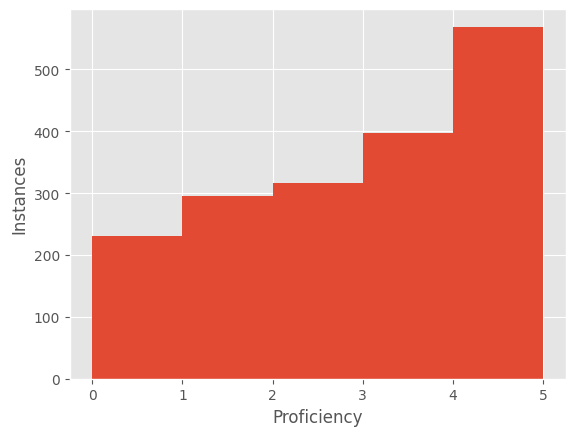

In [34]:
# Getting X and y
X = workable_data.drop('Proficiency', axis=1)
y = workable_data['Proficiency']

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the target variable Proficiency
plt.style.use("ggplot")
plt.hist(x=y, bins=5)
plt.xlabel("Proficiency")
plt.ylabel("Instances")
plt.show()

## Model Selection

### DecisionTreeClassifier

#### Model tuning

In [35]:
# Looking at the algorithm DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Dividing the data in a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)


# Defining the algorithm
tree = DecisionTreeClassifier(random_state=0)
param_grid_tree = {"max_depth": [4, 6, 8]}


grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)


print("Results for the model Decision Tree: \n")
print("Best parameter: {}".format(grid_search_tree.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_tree.best_score_))
print("done")

Results for the model Decision Tree: 

Best parameter: {'max_depth': 6}
Best cross_validation score: 0.41
done


#### Results

In [36]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Results for the model Decision Tree: \n ")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_tree.score(X_train, y_train)))
print("Accuracy on test set: {}".format(grid_search_tree.score(X_test, y_test)))
print("--------------------------------")


# Setting up for the confusion matrix/precision/f1-score
pred_grid_search_train = grid_search_tree.predict(X_train)
pred_grid_search_test = grid_search_tree.predict(X_test)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")

# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")

confusion_train = confusion_matrix(y_train, pred_grid_search_train)
confusion_test = confusion_matrix(y_test, pred_grid_search_test)

# Showing the confusion matrices
print("Confusion matrix on train set: \n{}".format(confusion_train))
print("--------------------------------")
print("Confusion matrix on test set: \n{}".format(confusion_test))

Results for the model Decision Tree: 
 
Accuracy on train set: 0.5297728667894414
Accuracy on test set: 0.39226519337016574
--------------------------------
precision on train set: 0.59
precision on test set: 0.41
--------------------------------
recall on train set: 0.51
recall on test set: 0.36
--------------------------------
f1-score on train set: 0.53
f1-score on test set: 0.36
--------------------------------
Confusion matrix on train set: 
[[122  38  23  22   0   1]
 [ 26 160  30  47   0   0]
 [  5  40  78 142  14   3]
 [  0   9  15 247  80  11]
 [  0   2   8 118 193  19]
 [  0   0   1  24  88  63]]
--------------------------------
Confusion matrix on test set: 
[[11  7  4  3  0  0]
 [ 2 12  7 10  1  0]
 [ 0  8  5 21  0  1]
 [ 0  3  2 19  9  3]
 [ 0  0  2 11 23  3]
 [ 0  1  0  2 10  1]]


### xgboost

#### Model tuning

In [37]:
# Looking at the xgboost algorithm 

xgboost = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)
param_grid_xgboost = {"objective": ["multi:softmax"], "max_depth": [4], "learning_rate": [0.1], "n_estimators": [20], "subsample": [0.6]}
# The above parameters were the best for GridSearchCV. Just kept the best ones to make the notebook run faster

grid_search_xgboost = GridSearchCV(xgboost, param_grid_xgboost, cv=5)
grid_search_xgboost.fit(X_train, y_train)


print("Results for the model xgboost: \n")
print("Best parameter: {}".format(grid_search_xgboost.best_params_))
print("Best cross_validation score: {:.2f}".format(grid_search_xgboost.best_score_))

Results for the model xgboost: 

Best parameter: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 20, 'objective': 'multi:softmax', 'subsample': 0.6}
Best cross_validation score: 0.46


#### Results

In [38]:
print("Results for the model xgboost: \n")

# Calculating the accuracy on both the training and test set
print("Accuracy on train set: {}".format(grid_search_xgboost.score(X_train, y_train)))
print("Accuracy on test set: {}".format(grid_search_xgboost.score(X_test, y_test)))
print("--------------------------------")


# Setting up for the confusion matrix/precision/recall
pred_grid_search_train = grid_search_xgboost.predict(X_train)
pred_grid_search_test = grid_search_xgboost.predict(X_test)

# Calculating precision
print("precision on train set: {:.2f}".format(precision_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("precision on test set: {:.2f}".format(precision_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")
  
# Calculating recall
print("recall on train set: {:.2f}".format(recall_score(y_train, pred_grid_search_train, average='macro', zero_division=1)))
print("recall on test set: {:.2f}".format(recall_score(y_test, pred_grid_search_test, average='macro', zero_division=1)))
print("--------------------------------")    
    
# Calculating the f1-score
print("f1-score on train set: {:.2f}".format(f1_score(y_train, pred_grid_search_train, average="macro", zero_division=1)))
print("f1-score on test set: {:.2f}".format(f1_score(y_test, pred_grid_search_test, average="macro", zero_division=1)))
print("--------------------------------")

confusion_train = confusion_matrix(y_train, pred_grid_search_train)
confusion_test = confusion_matrix(y_test, pred_grid_search_test)

# Showing the confusion matrices
print("Confusion matrix on train set: \n{}".format(confusion_train))
print("--------------------------------")
print("Confusion matrix on test set: \n{}".format(confusion_test))

Results for the model xgboost: 

Accuracy on train set: 0.5899324739103745
Accuracy on test set: 0.48066298342541436
--------------------------------
precision on train set: 0.63
precision on test set: 0.50
--------------------------------
recall on train set: 0.59
recall on test set: 0.47
--------------------------------
f1-score on train set: 0.60
f1-score on test set: 0.48
--------------------------------
Confusion matrix on train set: 
[[145  24  19  17   1   0]
 [ 31 174  24  31   3   0]
 [  7  65  97  95  16   2]
 [  0  10  20 234  89   9]
 [  1   0  12  82 221  24]
 [  0   0   2  19  65  90]]
--------------------------------
Confusion matrix on test set: 
[[15  6  2  2  0  0]
 [ 4 12  6  8  2  0]
 [ 0 12 11 11  0  1]
 [ 0  3  3 19  9  2]
 [ 0  1  1  7 25  5]
 [ 0  0  0  3  6  5]]


### Feature importances (from classification)

In [39]:
#Using the best parameters I found in GridSearchCV 
#and fitting the classifiers to show the feature importances
import numpy as np
xgboost_best_parameter = xgb.XGBClassifier(objective='multi:softmax', max_depth=4, learning_rate=0.1, n_estimators=20, subsample=0.6)
xgboost_best_parameter.fit(X_train, y_train)


#Making the function
def plot_feature_importances(classifier):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), classifier.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.title("Bar chart feature importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

#Making the bar plots
plot_feature_importances(tree_best_parameter)
plt.xlabel("Feature importance")

NameError: name 'tree_best_parameter' is not defined

### PCA - Dani

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(scaled_X)
pca.explained_variance_ratio_


array([0.27288429, 0.17658511, 0.15226901, 0.11084225, 0.08568687,
       0.07508782, 0.04349292, 0.03386227, 0.02371143, 0.01636974,
       0.00860541, 0.00060286])

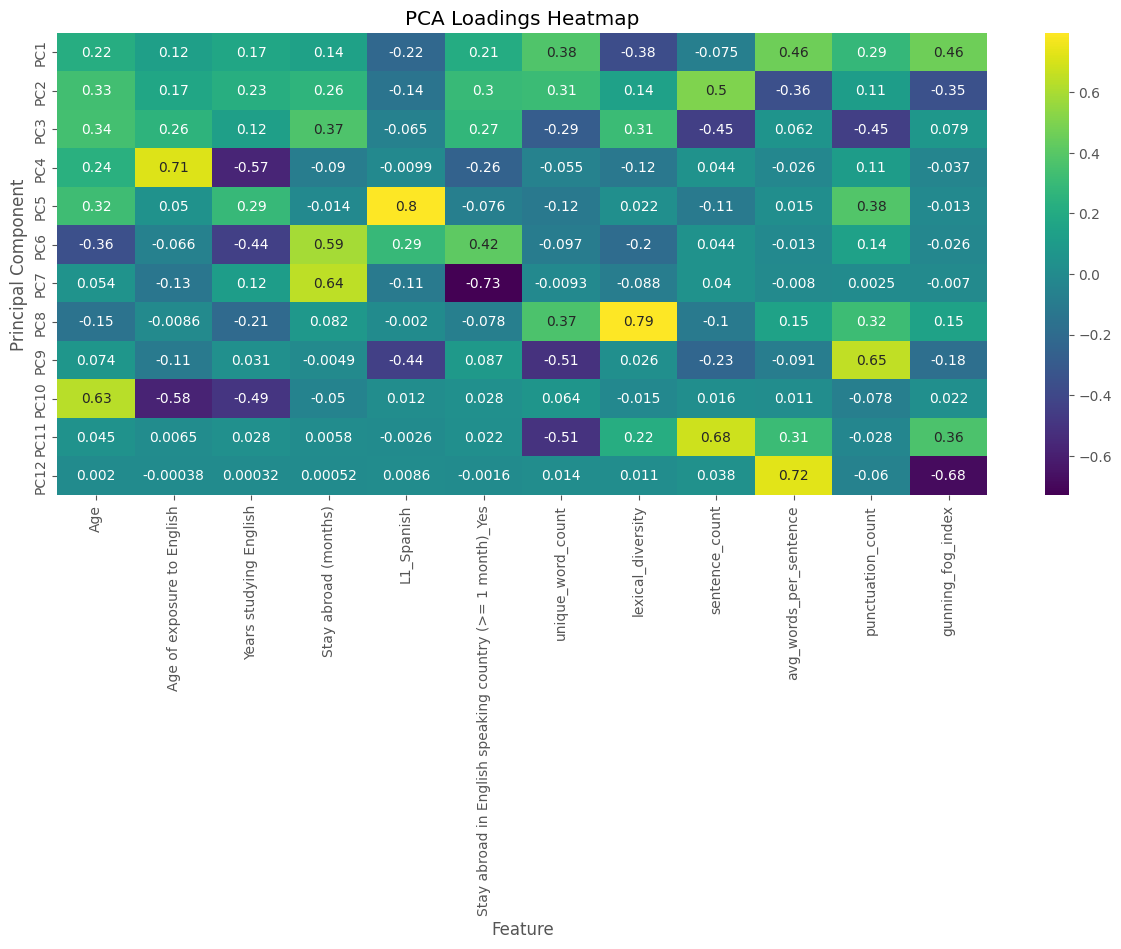

In [48]:

plt.figure(figsize=(15, 6))
sns.heatmap(pca.components_, annot=True, cmap='viridis',
            yticklabels=[f"PC{i+1}" for i in range(pca.components_.shape[0])],
            xticklabels=scaled_X.columns.tolist())
plt.title('PCA Loadings Heatmap')
plt.xlabel('Feature')
plt.ylabel('Principal Component')
plt.show()

In [49]:
PC1_loadings = pd.Series(pca.components_[0], index=scaled_X.columns, )

sorted_loadings = PC1_loadings.abs().sort_values(ascending=False)
sorted_loadings_series = PC1_loadings.loc[sorted_loadings.index]

sorted_loadings_series.index.name = 'feature'
sorted_loadings_series.name = 'coefficients of 1st PC loading'

sorted_loadings_series

feature
avg_words_per_sentence                                      0.460769
gunning_fog_index                                           0.457580
lexical_diversity                                          -0.376438
unique_word_count                                           0.375950
punctuation_count                                           0.285650
Age                                                         0.221288
L1_Spanish                                                 -0.220783
Stay abroad in English speaking country (>= 1 month)_Yes    0.210152
Years studying English                                      0.173641
Stay abroad (months)                                        0.144080
Age of exposure to English                                  0.123679
sentence_count                                             -0.074757
Name: coefficients of 1st PC loading, dtype: float64

### Covariance - Dani

In [50]:
scaler = StandardScaler()
scaler.fit(workable_data)
scaled_workable_data = pd.DataFrame(scaler.transform(workable_data), columns=workable_data.columns)

In [51]:
cov_matrix = scaled_workable_data.cov()
cov_matrix

,Proficiency,Age,Age of exposure to English,Years studying English,Stay abroad (months),L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index
Proficiency,1.000553,0.278364,0.058221,0.393877,0.241131,-0.569408,0.383824,0.602093,-0.154351,0.106743,0.265530,0.138988,0.279489
Age,0.278364,1.000553,0.560360,0.375131,0.303740,-0.145668,0.279609,0.263158,0.001915,-0.005918,0.111880,0.112150,0.114195
Age of exposure to English,0.058221,0.560360,1.000553,-0.241347,0.168189,-0.138344,0.090459,0.085392,-0.049427,-0.022929,0.064970,0.050126,0.063201
Years studying English,0.393877,0.375131,-0.241347,1.000553,0.157546,-0.088240,0.290502,0.298818,0.023179,0.022895,0.120406,0.079602,0.128217
Stay abroad (months),0.241131,0.303740,0.168189,0.157546,1.000553,-0.117992,0.451072,0.122821,0.012786,-0.029217,0.060390,-0.036645,0.067284
L1_Spanish,-0.569408,-0.145668,-0.138344,-0.088240,-0.117992,1.000553,-0.190936,-0.386045,0.162657,-0.091707,-0.212164,0.074326,-0.228693
Stay abroad in English speaking country (>= 1 month)_Yes,0.383824,0.279609,0.090459,0.290502,0.451072,-0.190936,1.000553,0.281450,-0.046118,0.034043,0.123529,0.035536,0.130973
unique_word_count,0.602093,0.263158,0.085392,0.298818,0.122821,-0.386045,0.281450,1.000553,-0.410321,0.461144,0.320028,0.548556,0.325002
lexical_diversity,-0.154351,0.001915,-0.049427,0.023179,0.012786,0.162657,-0.046118,-0.410321,1.000553,-0.056422,-0.573397,-0.499045,-0.556185
sentence_count,0.106743,-0.005918,-0.022929,0.022895,-0.029217,-0.091707,0.034043,0.461144,-0.056422,1.000553,-0.525506,0.328172,-0.523122


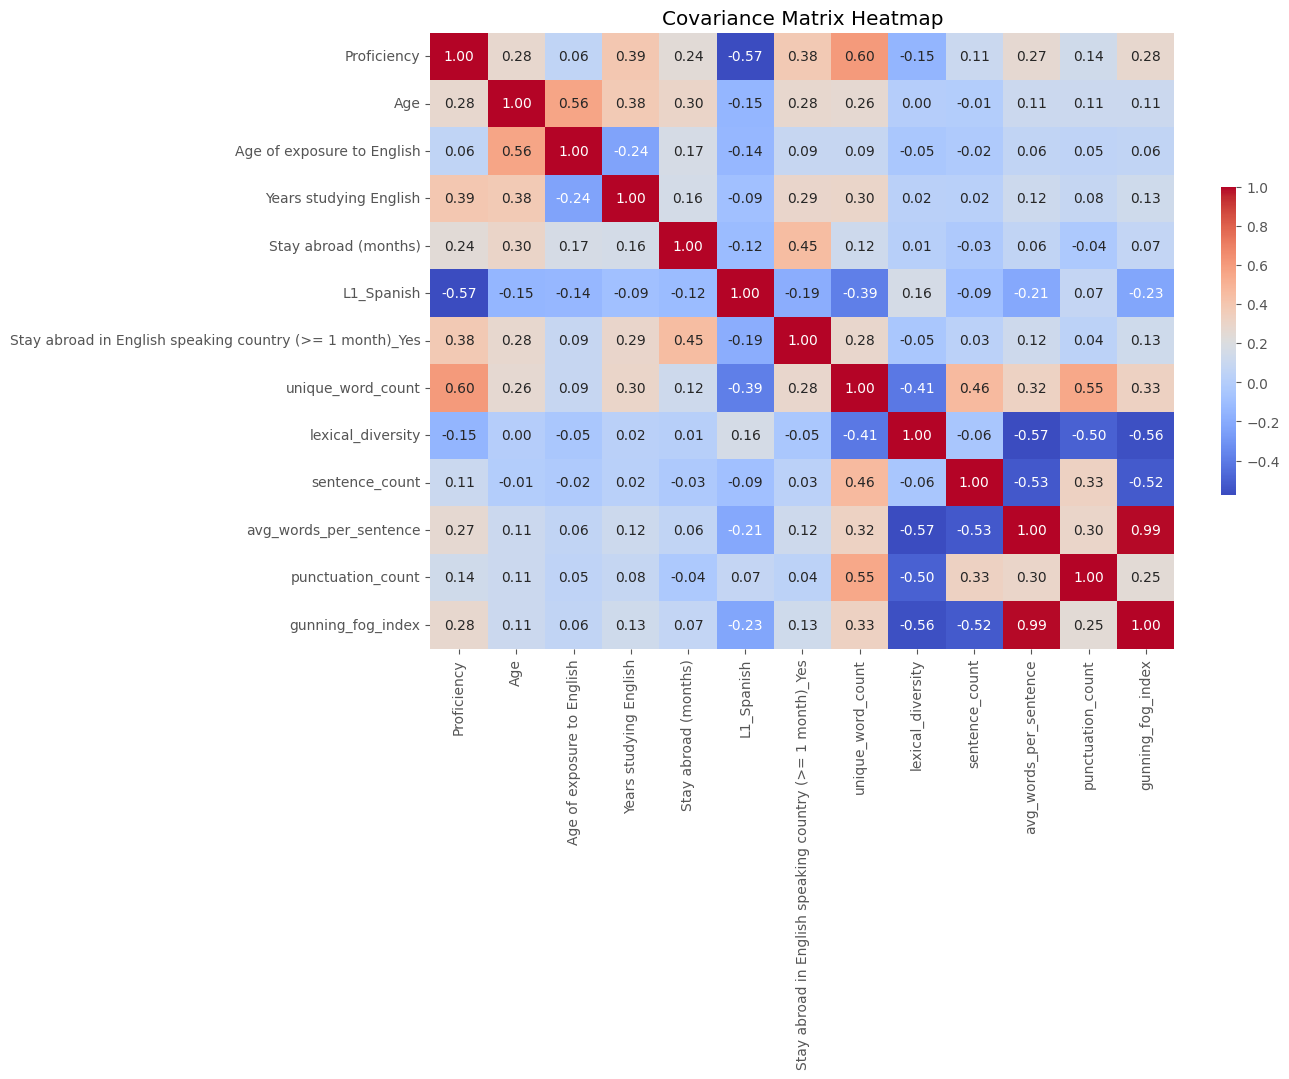

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .5})
plt.title('Covariance Matrix Heatmap')
plt.show()

In [53]:
cov_matrix = scaled_workable_data.cov()
cov_matrix_reset = cov_matrix.reset_index()
cov_long = pd.melt(cov_matrix_reset, id_vars='index')
cov_long.columns = ['Feature_1', 'Feature_2', 'Covariance']
cov_long_filtered = cov_long[cov_long['Feature_1'] != cov_long['Feature_2']]
cov_long_filtered['Abs_Covariance'] = cov_long_filtered['Covariance'].abs()
cov_long_filtered = cov_long_filtered.set_index('Abs_Covariance')
cov_long_filtered_sorted = cov_long_filtered.sort_index(ascending=False)
cov_long_filtered_sorted.head(60)


/tmp/ipykernel_1785/2539475279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_long_filtered['Abs_Covariance'] = cov_long_filtered['Covariance'].abs()


,Feature_1,Feature_2,Covariance
Abs_Covariance,,,
0.991168,avg_words_per_sentence,gunning_fog_index,0.991168
0.991168,gunning_fog_index,avg_words_per_sentence,0.991168
0.602093,unique_word_count,Proficiency,0.602093
0.602093,Proficiency,unique_word_count,0.602093
0.573397,lexical_diversity,avg_words_per_sentence,-0.573397
0.573397,avg_words_per_sentence,lexical_diversity,-0.573397
0.569408,Proficiency,L1_Spanish,-0.569408
0.569408,L1_Spanish,Proficiency,-0.569408
0.560360,Age,Age of exposure to English,0.560360


### Correlations

In [54]:
corr_matrix = scaled_workable_data.corr()
corr_matrix

,Proficiency,Age,Age of exposure to English,Years studying English,Stay abroad (months),L1_Spanish,Stay abroad in English speaking country (>= 1 month)_Yes,unique_word_count,lexical_diversity,sentence_count,avg_words_per_sentence,punctuation_count,gunning_fog_index
Proficiency,1.000000,0.278210,0.058189,0.393659,0.240998,-0.569093,0.383612,0.601761,-0.154265,0.106684,0.265383,0.138911,0.279335
Age,0.278210,1.000000,0.560051,0.374924,0.303572,-0.145588,0.279454,0.263012,0.001914,-0.005914,0.111818,0.112088,0.114132
Age of exposure to English,0.058189,0.560051,1.000000,-0.241214,0.168096,-0.138268,0.090409,0.085345,-0.049400,-0.022917,0.064934,0.050099,0.063166
Years studying English,0.393659,0.374924,-0.241214,1.000000,0.157459,-0.088191,0.290342,0.298653,0.023167,0.022883,0.120339,0.079558,0.128147
Stay abroad (months),0.240998,0.303572,0.168096,0.157459,1.000000,-0.117927,0.450822,0.122753,0.012779,-0.029201,0.060356,-0.036625,0.067247
L1_Spanish,-0.569093,-0.145588,-0.138268,-0.088191,-0.117927,1.000000,-0.190830,-0.385831,0.162567,-0.091657,-0.212046,0.074285,-0.228567
Stay abroad in English speaking country (>= 1 month)_Yes,0.383612,0.279454,0.090409,0.290342,0.450822,-0.190830,1.000000,0.281295,-0.046092,0.034024,0.123461,0.035516,0.130901
unique_word_count,0.601761,0.263012,0.085345,0.298653,0.122753,-0.385831,0.281295,1.000000,-0.410094,0.460889,0.319852,0.548253,0.324823
lexical_diversity,-0.154265,0.001914,-0.049400,0.023167,0.012779,0.162567,-0.046092,-0.410094,1.000000,-0.056390,-0.573081,-0.498769,-0.555877
sentence_count,0.106684,-0.005914,-0.022917,0.022883,-0.029201,-0.091657,0.034024,0.460889,-0.056390,1.000000,-0.525215,0.327991,-0.522833


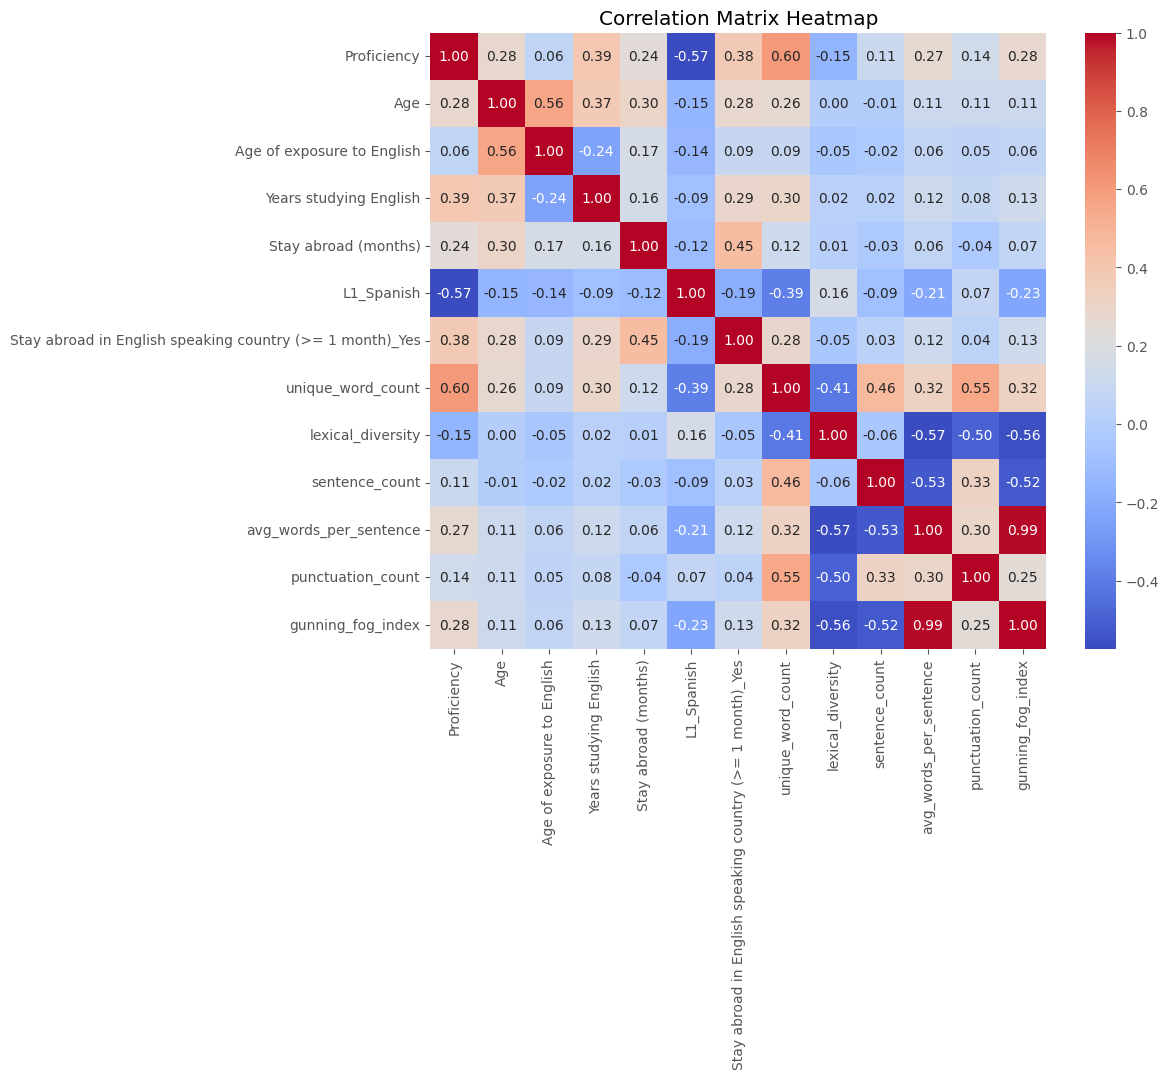

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [56]:
# Melt the correlation matrix into a long format
corr_long = pd.melt(corr_matrix.reset_index(), id_vars='index')
corr_long.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Remove self-correlation and duplicate pairs
corr_long = corr_long[corr_long['Feature_1'] != corr_long['Feature_2']]
corr_long['Abs_Correlation'] = corr_long['Correlation'].abs()

# Sort by 'Abs_Correlation' column
corr_long_sorted = corr_long.sort_values(by='Abs_Correlation', ascending=False).reset_index(drop=True)


corr_long_sorted.head(60)


,Feature_1,Feature_2,Correlation,Abs_Correlation
0,avg_words_per_sentence,gunning_fog_index,0.990620,0.990620
1,gunning_fog_index,avg_words_per_sentence,0.990620,0.990620
2,unique_word_count,Proficiency,0.601761,0.601761
3,Proficiency,unique_word_count,0.601761,0.601761
4,lexical_diversity,avg_words_per_sentence,-0.573081,0.573081
5,avg_words_per_sentence,lexical_diversity,-0.573081,0.573081
6,Proficiency,L1_Spanish,-0.569093,0.569093
7,L1_Spanish,Proficiency,-0.569093,0.569093
8,Age,Age of exposure to English,0.560051,0.560051
9,Age of exposure to English,Age,0.560051,0.560051


/tmp/ipykernel_2557/352321998.py:34: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=cmap,


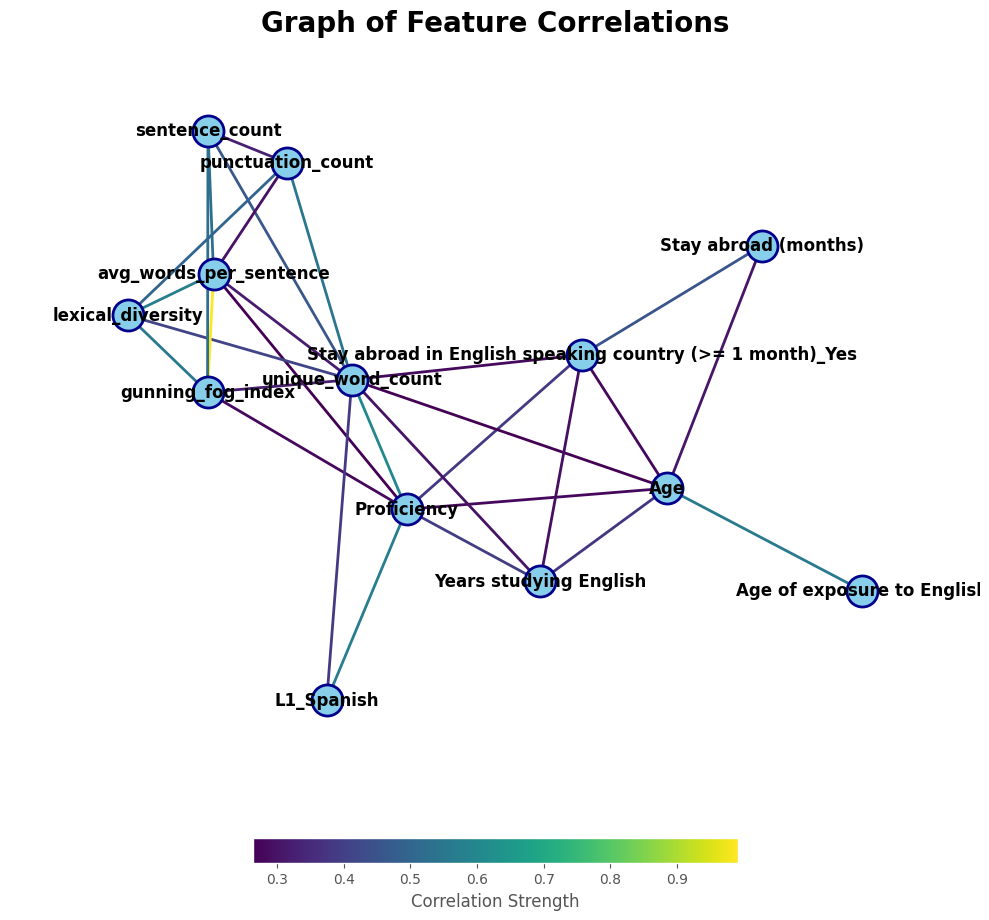

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1, iterations=20)

node_size = 500
node_color = 'skyblue'
node_border_color = 'darkblue'
nx.draw_networkx_nodes(G, pos, node_color=node_color, linewidths=2, edgecolors=node_border_color, node_size=node_size)
label_font_size = 12
nx.draw_networkx_labels(G, pos, font_size=label_font_size, font_weight='bold')
cmap = plt.cm.viridis 

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

norm = plt.Normalize(min(weights), max(weights))

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=cmap, edge_vmin=min(weights), edge_vmax=max(weights), width=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)
cb.set_label('Correlation Strength')

ax.axis('off')
ax.margins(0.1, 0.1)

plt.title('Graph of Feature Correlations', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


## Further Analysis

### 3 Groups - Taisiia